# КММФЯ, задание 6
## Методические указания по выполнению работы

Принцип составления *динамической матрицы* остается тем же, так что сразу перейдём к программной реализации:

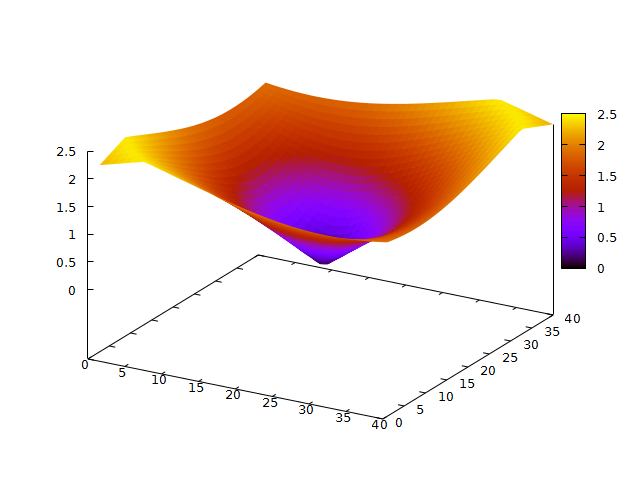

1

In [16]:
function k(x,y,z)
    (x+y+z)*a;
end

function Dynmatr(ax, ay, az)
    a11 = a22 = a33 = a44 = a55 = a66 = 6p/m;
    
    a14 = a25 = a36 = ( -1 - exp(2im*pi*k(-ax,0,0)) - exp(2im*pi*k(0,0,-az)) - exp(2im*pi*k(0,-ay,0))
     - exp(2im*pi*k(-ax,-ay,0)) - exp(2im*pi*k(-ax,-ay, az)) )*p/m;
    a41 = a52 = a63 = ( -1 - exp(2im*pi*k( ax,0,0)) - exp(2im*pi*k(0,0, az)) - exp(2im*pi*k(0, ay,0))
     - exp(2im*pi*k( ax, ay,0)) - exp(2im*pi*k( ax, ay,-az)) )*p/m; ;

    D = [a11 0 0 a14 0 0;
         0 a22 0 0 a25 0;
         0 0 a33 0 0 a36;
         a41 0 0 a44 0 0;
         0 a52 0 0 a55 0;
         0 0 a63 0 0 a66];
end

a = 1; #4.95e-10;
p = 1; #4e-24;
m = 1; #34.53e-26;

X = linspace(-1//8*pi,1//8*pi,40);
Z = Y = X;
R = X*sqrt(2);
N = length(X);
OmX = zeros(N);
OmK = zeros(N);
OmL = zeros(N);
Dmx = ev = zeros(6);
ev1 = zeros(N, N);
ev2 = zeros(N, N);

for i in eachindex(X)
    for j in eachindex(Y)
        Dmx = Dynmatr( X[i], Y[j], Z[N >> 1] );
        ev = eigvals(Dmx); # eigenvalues
        ev1[i,j] = sqrt( abs(ev[1]) );
        ev2[i,j] = sqrt( abs(ev[4]) );
    end
end

OmXopt = zeros(N);
OmLopt = zeros(N);
OmXacs = zeros(N);
OmLacs = zeros(N);

for i = 1:N
    OmXopt[i] = ev1[i,N >> 1];
    OmLopt[i] = ev2[i,i];
    OmXacs[i] = ev1[i,N >> 1];
    OmLacs[i] = ev2[i,i];
end

using Gaston


surf(ev1,plotstyle="pm3d") # and ev2 -> acustic mode


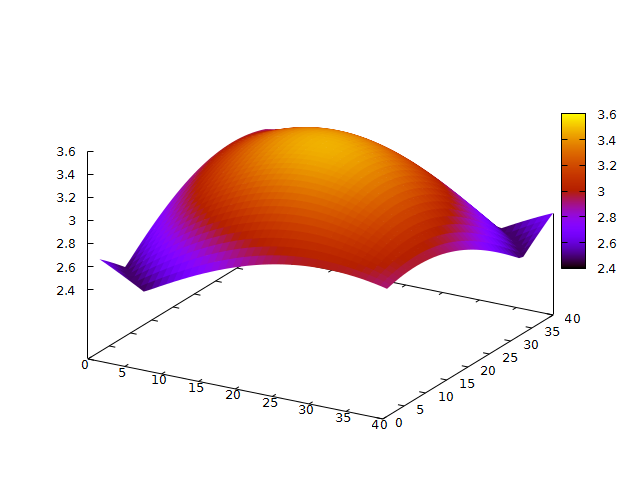

1

In [17]:
surf(ev2,plotstyle="pm3d") # and ev4 -> optical mode

Поскольку динамическая матрица для этой задачи шестого порядка, то должно наблюдаться шесть независимых колебательных мод: одна продольная акустическая, одна продольная оптическая, две поперечных акустических и две поперечных оптических. Но для одинаковых упругостей связей все оптические и акустические моды совпадают, и, следовательно, наблюдается лишь две трехкратно вырожденные фононные ветви.

### Используемая литература

+ *Давыдов А.* Теория твердого тела
+ *Н. Ашкрофт Н. Мермин* Физика твердого тела том 2 
+ *Мадисон П. А.* Расчет собственных колебательных мод фононных кристаллов
+ *Окомельков А. В.* Спектр нормальных волн в двумерной решетке нейтральных атомов